Some exercises for the problem solving session

Problem from group assignment 1: what is the expected number of coin tosses before the first head appears? Let's say we have computed it and want to check if it is reasonable: use simulation!

In [2]:
import numpy as np



In [5]:
n = 100000
# store a sequence of required attempts in n trials
all_req_attempts = np.array([])
for i in range(n):
  # required attempts in a current run
  req_attempts = 0
  
  while(1):
    head_or_coin = np.random.choice(2, 1)
    req_attempts = req_attempts + 1
    if(head_or_coin == 1):
      # when we finally got a head, remember the number of attempts
        all_req_attempts = np.append(all_req_attempts, req_attempts)
        break


all_req_attempts.mean()

np.float64(2.00354)

Chapter 1, problem 5

## Problem 5, Chap 1

In [3]:
import numpy as np

In [10]:
# the function returns True if we have obtained 2 heads, say head = 1 and tail = 0
def true_event(sequence):
    # check first if the sequence has 2 heads:
    if (np.sum(sequence) == 2):
        # if yes, check if the last element of the sequence was 1 - then the sequence is correct
        if (sequence[-1] == 1):
            return 1
    # otherwise, we got our number wrong
    return 0

In [15]:
k = 4
# randint (a, b) generates random numbers in [a, b) ! so b is not included
# generate a sequence of outcomes of size k = 4
x = np.random.randint(0,2,size=k)

print(x)
true_event(x)

[1 0 0 1]


1

Now define a function that takes a vector of sequences and for each returns true or false

In [52]:
def true_event_vector(sequence):
    return (np.sum(x,axis=1) == 2)*(x[:,-1] == 1)

In [53]:
k_max = 4

x = np.random.randint(0,2,size=(100000,k))
x

array([[1, 0, 1, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1]], shape=(100000, 4))

Empirically compute the probability (the fraction of 1s in the obtained sequence)

In [55]:
np.mean(true_event_vector(x))

np.float64(0.18669)

What is the actual probability that k trials required? Hint: what is the probability of obtaining exactly 1 head in k-1 trials?

In [37]:
p = 1/2
(k-1)*((1-p)**(k-2)*p)*p

0.1875

## Problem 10, Chap 1

In [307]:
import numpy as np

In [38]:
# the door can take values 1, 2, 3
door = np.random.randint(1,4,size=100000)

print(door)
#print(door)
# we pick the 1st door 
np.mean(door == 1) # Probability of getting a price when not switching

[3 2 3 ... 1 2 1]


np.float64(0.32991)

Now let's compute the probability of changing to another door

In [39]:
from random import randint
host = [] # Door opened by host
for d in door:
    if (d == 1):
        # Randomly open either 2 or 3
        host.append(randint(2,3))
    elif (d == 2):
        host.append(3)
    elif (d == 3):
        host.append(2)

In [40]:
switch_success = [] # If switching was a success
for d,h in zip(door,host):
    if (h == 2) and d==3: # Switching from 1 to 3 was a success
        switch_success.append(1)
    elif (h == 3) and d==2: # Switching from 1 to 2 was a success
        switch_success.append(1)
    else:
        switch_success.append(0)

In [41]:
np.mean(switch_success)

np.float64(0.67009)

Problem from group assignment 1: What is the CDF and PDF of R = sqrt(X^2 + Y^2) where X and Y are uniformly distributed on a unit disc. Let's simulate the points first

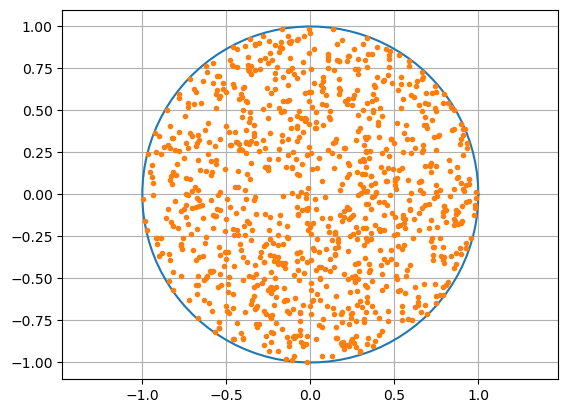

In [58]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
r = np.random.uniform(low=0, high=1, size=n)  # radius
theta = np.random.uniform(low=0, high=2*np.pi, size=n)  # angle

# Polar coordinates transformation
x = np.sqrt(r) * np.cos(theta)
y = np.sqrt(r) * np.sin(theta)

# make the line
a = np.linspace(0, 2*np.pi, 100)
# perform a transformation to do a circle
cx,cy = np.cos(a), np.sin(a)

fg, ax = plt.subplots(1, 1)
ax.plot(cx, cy,'-') # draw unit circle line
ax.plot(x, y, '.') # plot random points
ax.axis('equal')
ax.grid(True)
fg.canvas.draw()
plt.show()

Now let's look at R:

In [59]:
r = np.sqrt(x**2 + y**2)
r

array([0.31704505, 0.70253134, 0.28712156, 0.41139445, 0.8024451 ,
       0.74714834, 0.98969316, 0.2831147 , 0.84182906, 0.80209344,
       0.97605153, 0.80992952, 0.74919387, 0.94407901, 0.85600448,
       0.88847846, 0.62607603, 0.75428217, 0.88300037, 0.92442227,
       0.99784857, 0.55628493, 0.88923967, 0.81655629, 0.84047283,
       0.83883708, 0.9897884 , 0.80209719, 0.63369477, 0.36480479,
       0.72945852, 0.70561063, 0.85328089, 0.32486773, 0.28967493,
       0.41793055, 0.91490443, 0.78330572, 0.98889316, 0.82607762,
       0.92612918, 0.95416762, 0.90575027, 0.99239641, 0.78798782,
       0.93772832, 0.51939928, 0.42071854, 0.03133107, 0.43707686,
       0.79757065, 0.6406724 , 0.96424849, 0.64817161, 0.39361856,
       0.51815343, 0.92937914, 0.62173488, 0.67850229, 0.710446  ,
       0.53250167, 0.56976916, 0.66124571, 0.83197055, 0.64583584,
       0.87291976, 0.97917552, 0.95269051, 0.7621167 , 0.72922996,
       0.39023169, 0.3595697 , 0.92321194, 0.48509322, 0.67074

Check histogram of R

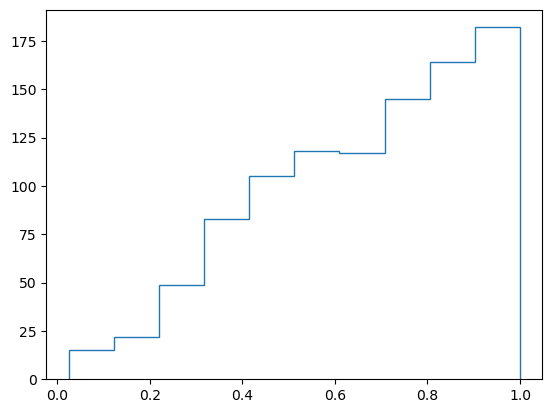

In [60]:
counts, bins = np.histogram(r)
plt.stairs(counts, bins)
plt.show()

Check the PMF and CDF; Use the Utils script to make and plot the empirical distribution

In [48]:
from utils import makeEDF, plotEDF


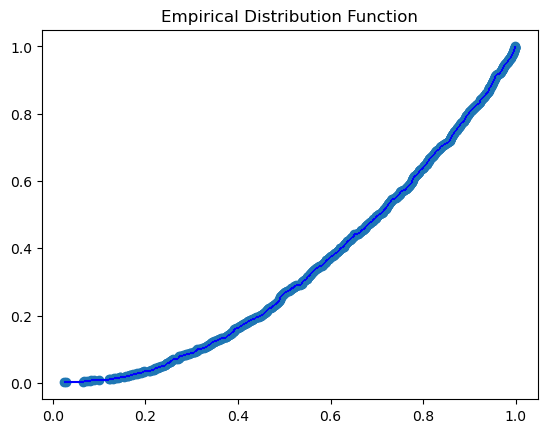

In [49]:
my_edf = makeEDF(r)
my_edf

plotEDF(my_edf)

In [50]:
r.mean()

np.float64(0.6664743967613197)

Some work with text parsing

In [20]:
csv_file = open('breast_cancer.csv', 'r')

# read the whole data line by line
all_lines = csv_file.readlines()

# obtain a list, each element of which is a single line from the imported csv file 

all_lines




['id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst\n',
 '842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189\n',
 '842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902\n',
 '84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456

In [21]:
all_lines[0]

'id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst\n'

We see that there is a line break in the end, how to get rid of it?

In [22]:
all_lines[0].strip()

'id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst'